In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.bus.largest.pbf"

In [4]:
s_e_coordinates = {
    's_coordinates_x': 4.4337472, 
    's_coordinates_y': 51.9514406, 
    'e_coordinates_x': 4.4440053, 
    'e_coordinates_y': 51.9281268
}

# Bus

In [5]:
bus_stations, bus_edges, bus_nodes, bus_routes = prepare_bus(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████| 164083/164083 [00:23<00:00, 7078.66it/s]


In [6]:
bus_routes = bus_routes.loc[bus_routes.network == 'Bus Rotterdam']
bus_routes = bus_routes.loc[bus_routes.ref != '668']
bus_routes = bus_routes.loc[bus_routes.name != 'Bus 77: Rotterdam Zuidplein => Rotterdam Katendrecht']
bus_routes = bus_routes.loc[bus_routes.name != 'Bus 30: Capelle Schollevaar => Rotterdam Station Alexander']
bus_routes = bus_routes.loc[bus_routes.name != 'Bus 36: Rotterdam Station Alexander => Rotterdam Kralingse Zoom']
bus_routes = bus_routes.loc[bus_routes.name != 'Bus 547: Rotterdam Noordereiland => Rotterdam Noordereiland']
bus_routes = bus_routes.loc[bus_routes.name != 'Bus 607: Capelle Centrum => Rotterdam Capelsebrug']
bus_routes = bus_routes.loc[bus_routes.name != 'Bus 607: Rotterdam Capelsebrug => Capelle Centrum']
bus_routes = bus_routes.loc[bus_routes.name != 'Bus 98: Krimpen aan den IJssel Van Ostadelaan => Krimpen aan den IJssel => Krimpen aan den IJssel Van Ostadelaan']
bus_routes = bus_routes.loc[bus_routes.service != 'night'].reset_index(drop=True)

In [7]:
bus_routes, check_name = check_bus_routes(bus_stations, bus_routes)

In [8]:
replacement_dict = {
    'Slikkerveer, Sporttunnel': 'Ridderkerk, Sporttunnel', # Sporttunnel
    'Dordrecht, Station': 'Dordrecht, Centraal Station',
    'Lansingerland-Zoetermeer Zuidplein': 'Station Lansingerland-Zoetermeer Zuidplein',
    'Ridderkerk, Donkersloot': 'Ridderkerk, Groenendijk', # Groenendijk
        
    'Rotterdam, Caïrostraat': 'Rotterdam, Marconiplein',
    'Schiedam, Nieuwe Maasstraat': 'Schiedam, Station Schiedam Centrum',
    'Rotterdam, Meeuwenstaart': 'Rotterdam, Sleephellingstraat Zuid', # 'Rotterdam, Station Blaak'   'Station Blaak'
    'Barendrecht, Station NS': 'Barendrecht, Station Barendrecht',
    
    'Rotterdam, Damstraat': 'Damstraat',
    'Rotterdam, Metro Pernis': 'Pernis Rotterdam, Pernis Metro', # Pernis Metro
    # 'Rotterdam, SS Rotterdam': 'SS Rotterdam',
    'Barendrecht, Station': 'Barendrecht, Station Barendrecht',
    'Rotterdam, Capelsebrug': 'Rotterdam, Capelsebrug Hoog',
    'Rotterdam, Zuidplein': 'Rotterdam, Zuidplein Hoog',


    'Poortugaal Metro': 'Poortugaal, Poortugaal Metro'
    
}


bus_stations, bus_routes, check_name = recheck_bus_routes(replacement_dict, bus_stations, bus_routes)

In [9]:
replacement_dict = {

    'Barendrecht, Station Barendrecht Barendrecht': 'Barendrecht, Station Barendrecht',
    'Rotterdam, Capelsebrug Hoog Metro': 'Rotterdam, Capelsebrug Metro', 
    'Rotterdam, Zuidplein Hoog Hoog': 'Rotterdam, Zuidplein Hoog',
    'Poortugaal, Poortugaal, Poortugaal Metro': 'Poortugaal, Poortugaal Metro'
    
    
}
bus_stations, bus_routes, check_name = recheck_bus_routes(replacement_dict, bus_stations, bus_routes)

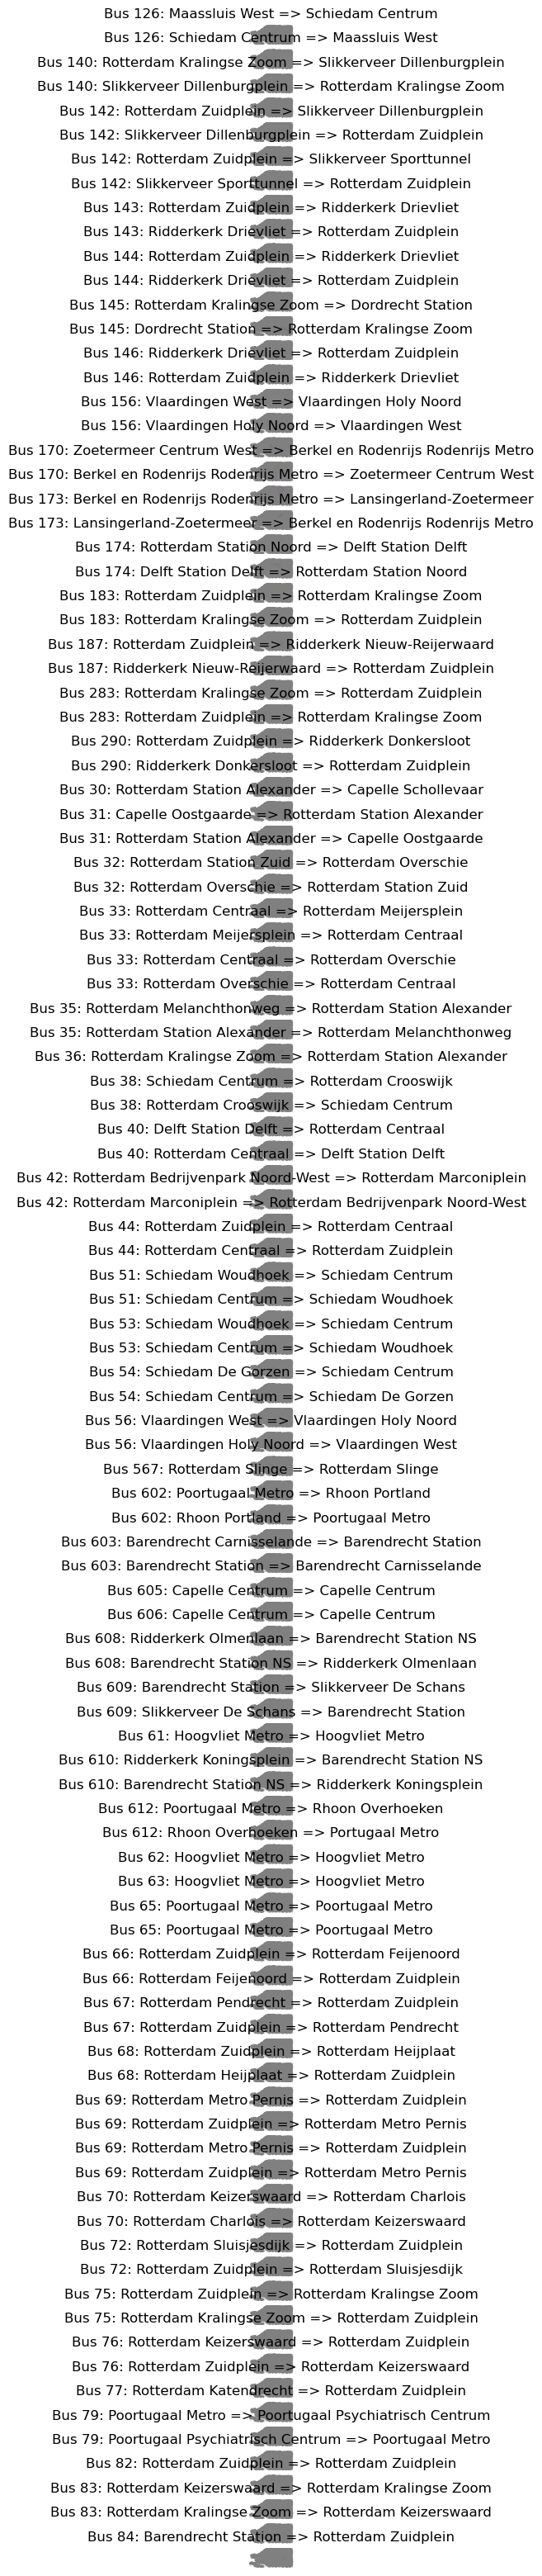

In [10]:
bus_order_route_dict, bus_shortest_path_pairs, bus_shortest_path_edges, bus_edges_dict = bus(bus_stations, bus_edges, bus_nodes, bus_routes, city='Rotterdam')

In [11]:
bus_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(bus_order_route_dict, bus_routes)

In [12]:
aggregation_functions = {
    'name': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [13]:
bus_new_nodes = add_columns_to_nodes(bus_order_route_dict, aggregation_functions, bus_nodes)

In [14]:
bus_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(bus_shortest_path_edges, bus_routes)

In [15]:
aggregation_functions = {
    'geometry': 'first',
    'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [16]:
bus_new_edges = add_columns_to_edges(bus_shortest_path_edges, aggregation_functions,bus_edges)

In [17]:
bus_path_s_e, bus_length_s_e, bus_short_path_edges_s_e, bus_start_end_points_coordinates_pairs, bus_start_end_nearest_id_pairs = transfer_shortest_path(s_e_coordinates, bus_new_edges, bus_new_nodes)

In [18]:
bus_short_path_edges_s_e

osm_id                                           geometry  \
21473     7531167  LINESTRING (4.4383054 51.9353866, 4.4382146 51...   
21475     7531171  LINESTRING (4.4304819 51.9385488, 4.4294089 51...   
21476     7531171  LINESTRING (4.4294089 51.9394798, 4.42766 51.9...   
21477     7531171  LINESTRING (4.42766 51.9410063, 4.4274745 51.9...   
21478     7531172  LINESTRING (4.4396641 51.933326, 4.4396547 51....   
...           ...                                                ...   
133567  859439938  LINESTRING (4.4399815 51.9312313, 4.4398677 51...   
135077  891327908  LINESTRING (4.4365783 51.9367882, 4.4365722 51...   
137612  925611582  LINESTRING (4.4270397 51.941574, 4.4269617 51....   
137614  925611585  LINESTRING (4.4269617 51.9416395, 4.4268939 51...   
137617  925611588  LINESTRING (4.4274745 51.9411555, 4.4274332 51...   

         highway    id_x  from_id   to_id    distance      time  weights  \
21473   tertiary   21473    19901   19902   21.996681  0.001760       21   
21475   tertiary   21475    19905  163667  127.148514  0.010172      127   
21476   tertiary   21476   163667  163755  208.060056  0.016645      208   
21477   tertiary   21477   163755   19906   20.930162  0.001674       20   
21478   tertiary   21478    19907  163670  129.867374  0.010389      129   
...          ...     ...      ...     ...         ...       ...      ...   
133567   primary  133567    19920   36360   17.130923  0.001370       17   
135077  tertiary  135077    19909   78182    6.785872  0.000543        6   
137612  tertiary  137612    20253  130466    9.046481  0.000724        9   
137614  tertiary  137614   130466   20240    7.851421  0.000628        7   
137617  tertiary  137617    19906   20252   30.609312  0.002449       30   

                 to_from           from_to      id_y  count_weight  \
21473     (19901, 19902)    (19902, 19901)       NaN           NaN   
21475    (19905, 163667)   (163667, 19905)       NaN           NaN   
21476   (163667, 163755)  (163755, 163667)       NaN           NaN   
21477    (163755, 19906)   (19906, 163755)   21477.0           1.0   
21478    (19907, 163670)   (163670, 19907)   21478.0           1.0   
...                  ...               ...       ...           ...   
133567    (19920, 36360)    (36360, 19920)  133567.0           1.0   
135077    (19909, 78182)    (78182, 19909)       NaN           NaN   
137612   (20253, 130466)   (130466, 20253)       NaN           NaN   
137614   (130466, 20240)   (20240, 130466)       NaN           NaN   
137617    (19906, 20252)    (20252, 19906)       NaN           NaN   

                                          route_name_list     ref route  
21473                                                 NaN     NaN   NaN  
21475                                                 NaN     NaN   NaN  
21476                                                 NaN     NaN   NaN  
21477   Bus 33: Rotterdam Centraal => Rotterdam Overschie      33   bus  
21478   Bus 40: Rotterdam Centraal => Delft Station Delft      40   bus  
...                                                   ...     ...   ...  
133567  Bus 40: Delft Station Delft => Rotterdam Centr...  40, 40   bus  
135077                                                NaN     NaN   NaN  
137612                                                NaN     NaN   NaN  
137614                                                NaN     NaN   NaN  
137617                                                NaN     NaN   NaN  

[78 rows x 16 columns]

In [19]:
distance_on_bus = bus_short_path_edges_s_e['distance'].sum()

In [20]:
bus_distance_s_s_tuple, bus_distance_e_e_tuple = walking_linear_distance(bus_start_end_points_coordinates_pairs, bus_start_end_nearest_id_pairs, bus_new_nodes)

In [21]:
bus_distance_s_s_tuple

189.21116334328738

In [22]:
bus_distance_e_e_tuple

113.18613941183533

In [23]:
choosebus_using_time_tuple = transfer_using_time(bus_short_path_edges_s_e, bus_distance_s_s_tuple, bus_distance_e_e_tuple)

In [24]:
choosebus_using_time_tuple

(0.3766898623990497, 23, 0.3162104018480252, 0.06047946055102454)

<Axes: >

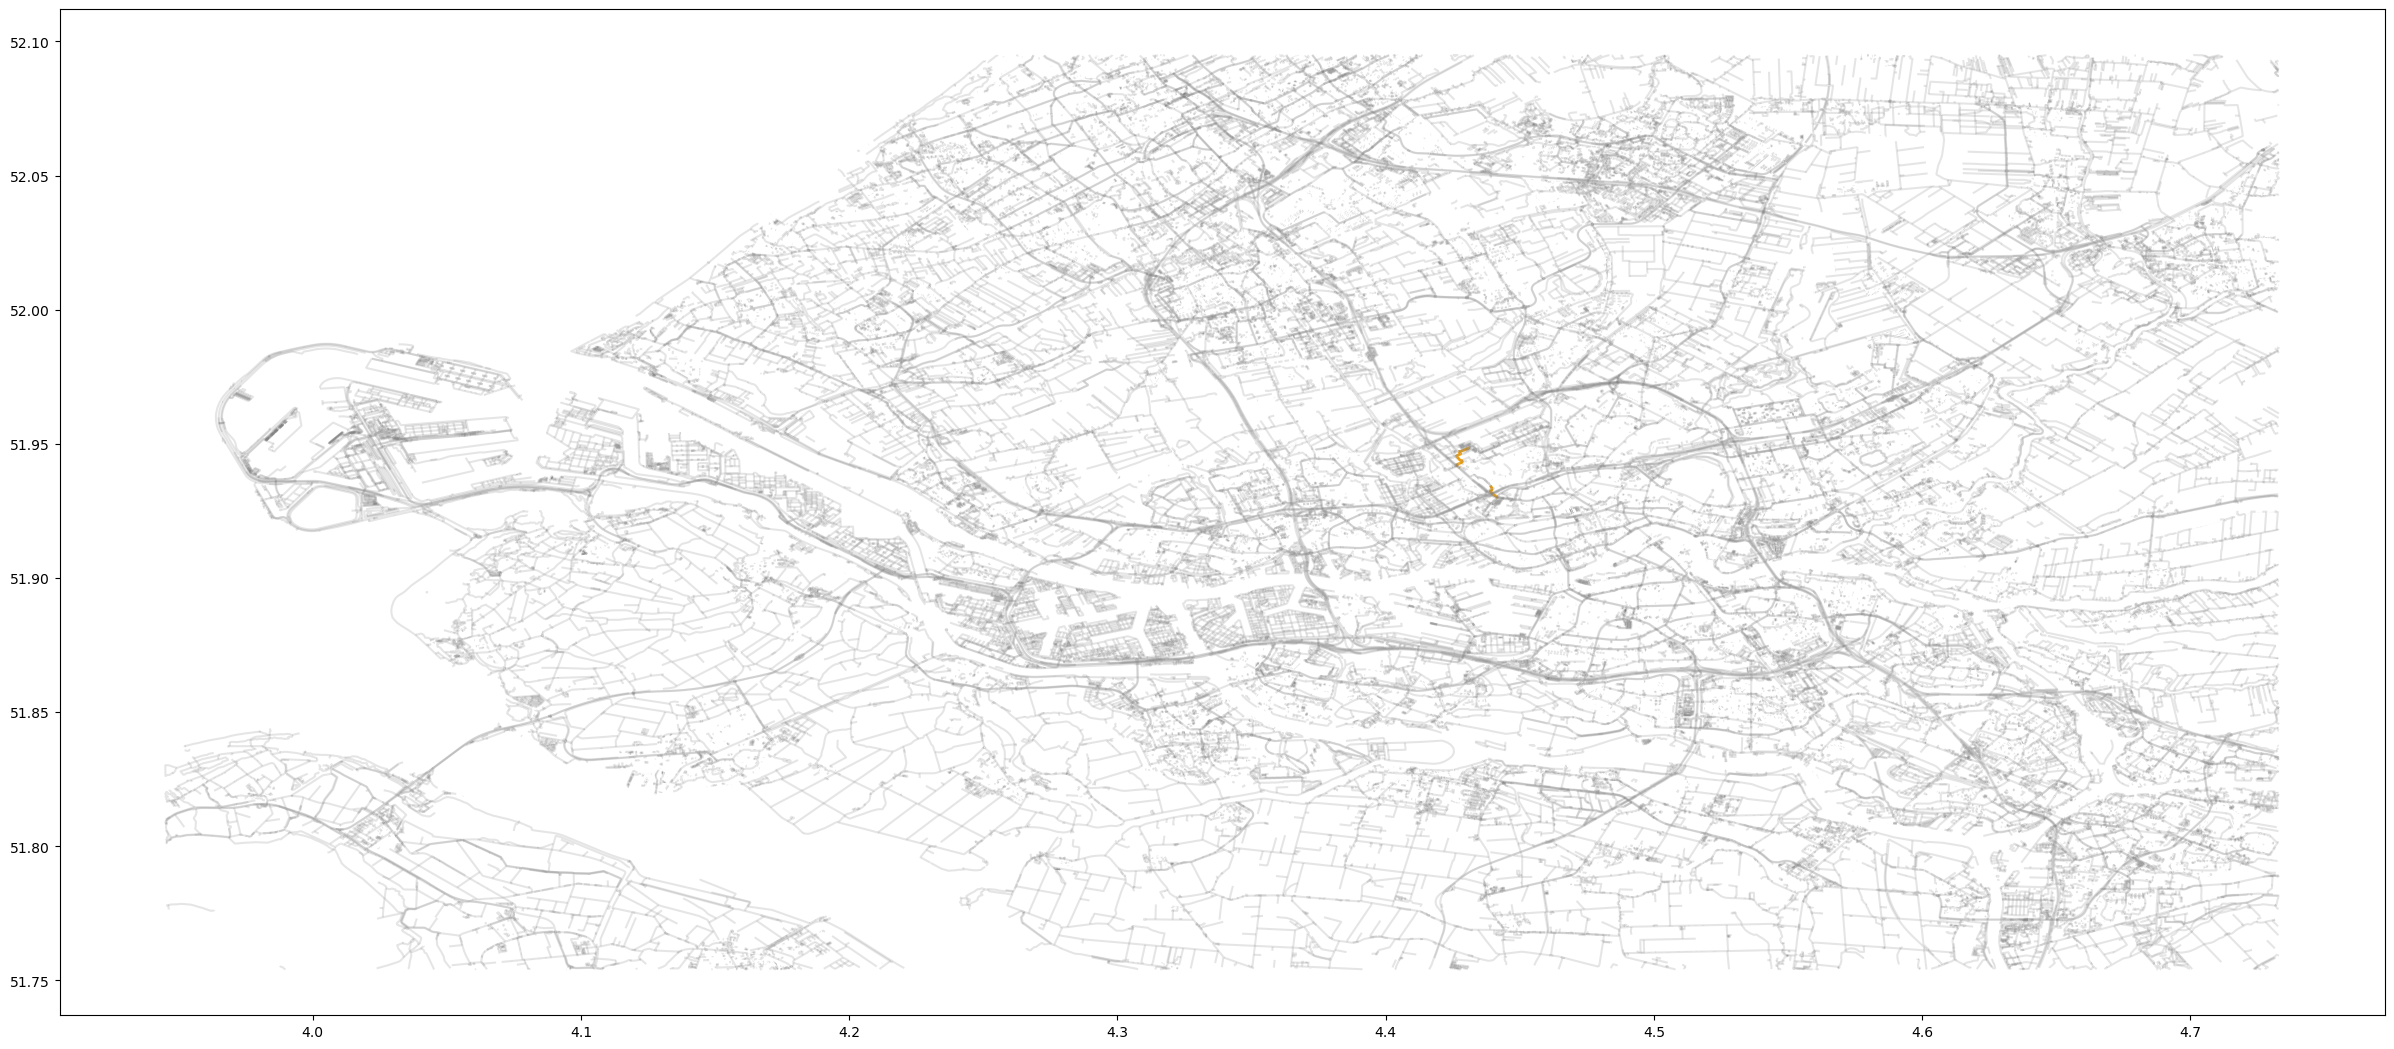

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(bus_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)
gpd.GeoDataFrame(bus_short_path_edges_s_e.copy()).plot(ax=ax, zorder=1, linewidth=(bus_short_path_edges_s_e.count_weight) * 2, color='orange')

<Axes: >

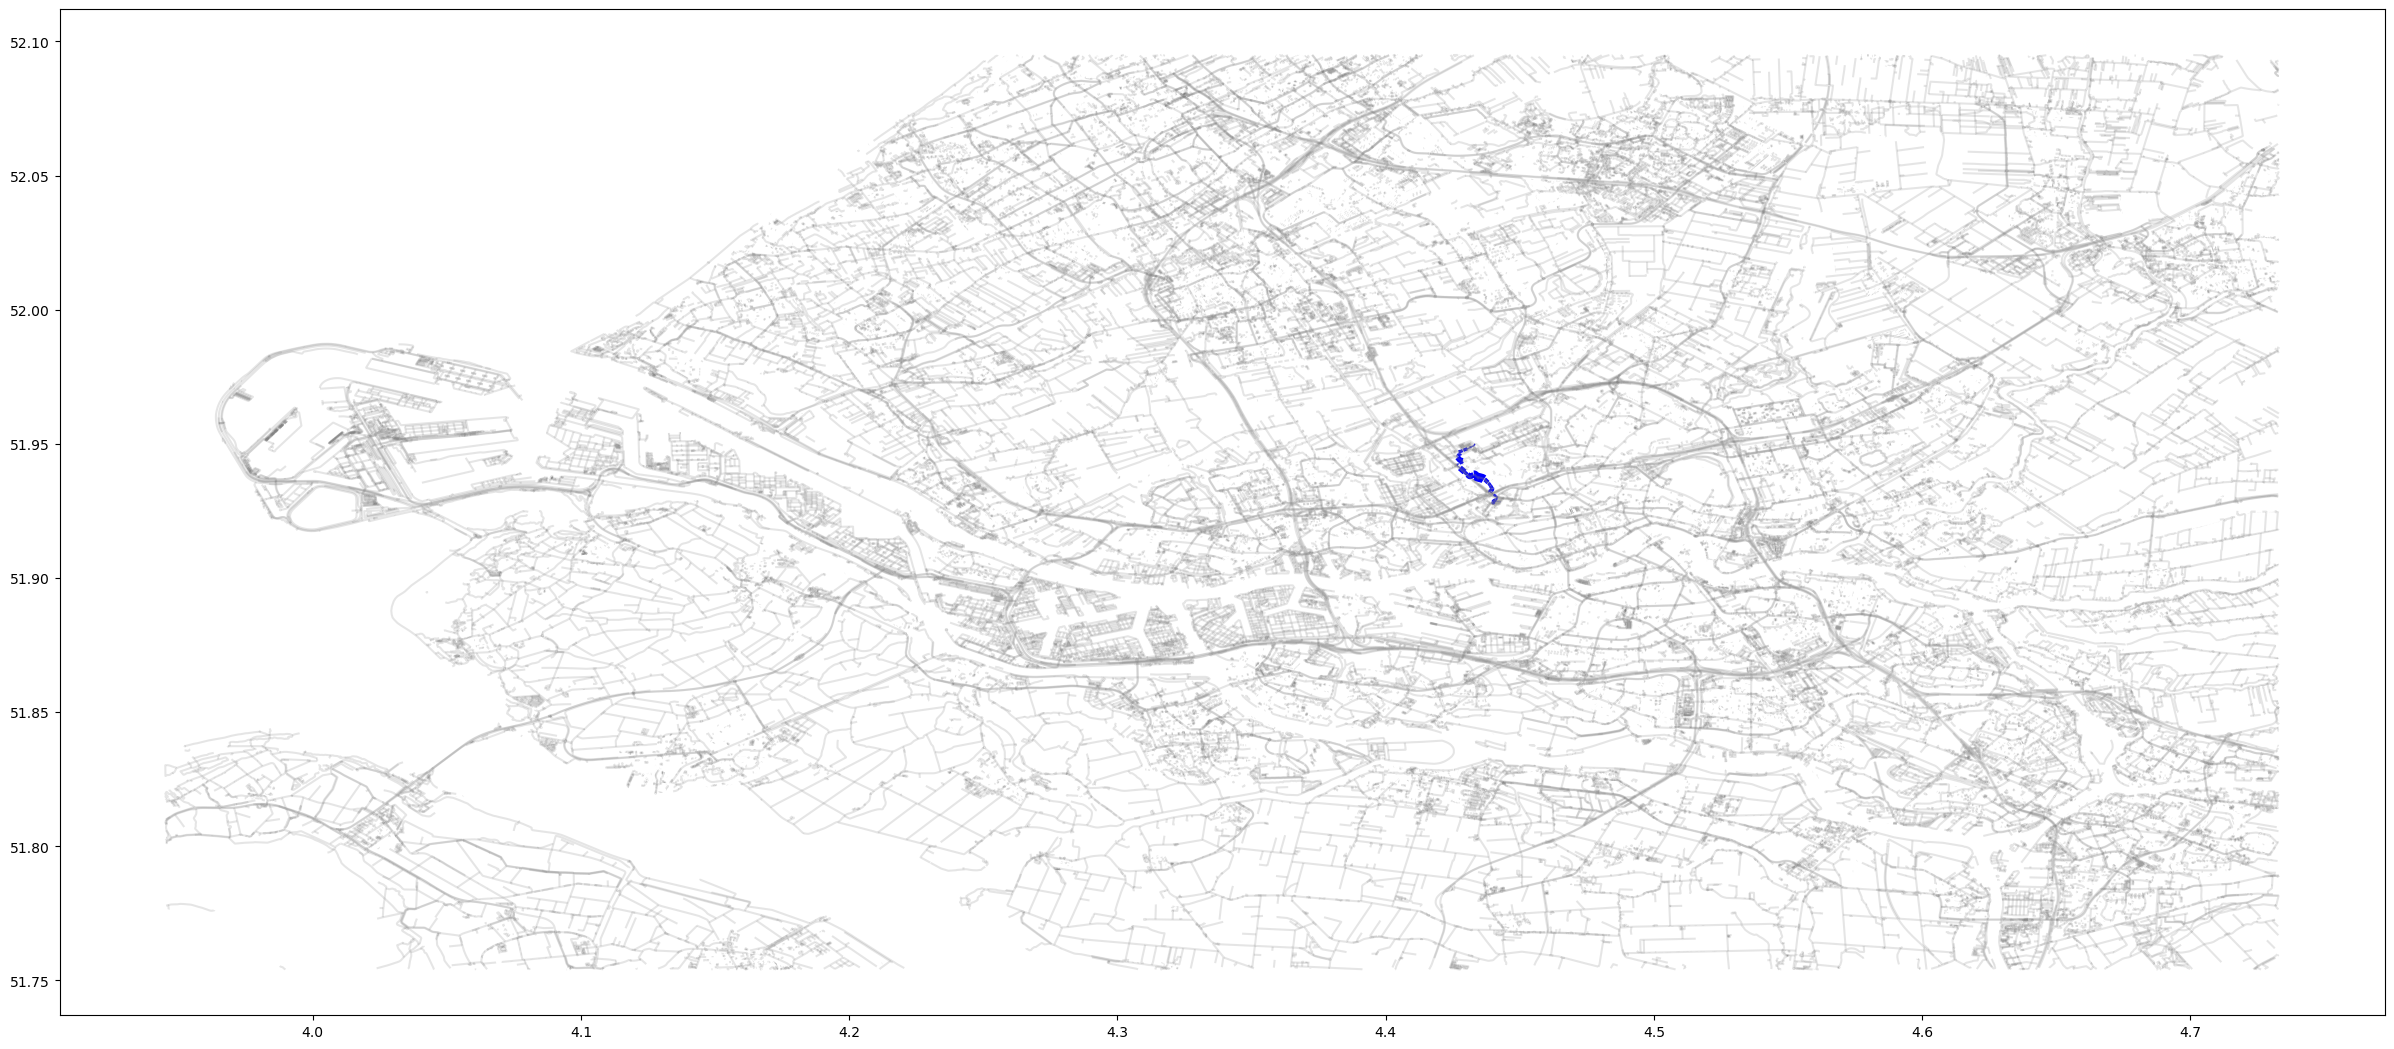

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(bus_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)
gpd.GeoDataFrame(bus_short_path_edges_s_e.copy()).plot(ax=ax, zorder=1, linewidth=(bus_short_path_edges_s_e.weights/50), color='blue')

# Subway

In [5]:
osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.bus.largest.pbf"

In [6]:
sub_stations, edges, nodes, sub_routes, check_name = prepare_metro(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 1579/1579 [00:00<00:00, 8450.30it/s]


In [7]:
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}


sub_routes, check_name = recheck_metro_routes(replacement_dict, sub_stations, sub_routes)

In [8]:
sub_routes

osm_id   route                       to  \
0    2785672  subway         Vlaardingen West   
1    2785673  subway                Binnenhof   
2   11174054  subway         Schiedam Centrum   
3   11174055  subway                Binnenhof   
4   11174056  subway                Binnenhof   
5   11174057  subway           Kralingse Zoom   
6    2785674  subway  Hoek van Holland Strand   
7    2785675  subway               Nesselande   
8   11171043  subway          Steendijkpolder   
9   11171044  subway               Nesselande   
10   2785676  subway                  De Terp   
11   2785677  subway                De Akkers   
12   2785504  subway       Rotterdam Centraal   
13   2785505  subway                De Akkers   
14   2777286  subway                   Slinge   
15   2777287  subway        Den Haag Centraal   

                                              name ref         network  \
0           Metro A: Binnenhof => Vlaardingen West   A  Rail Rotterdam   
1           Metro A: Vlaardingen West => Binnenhof   A  Rail Rotterdam   
2           Metro A: Binnenhof => Schiedam Centrum   A  Rail Rotterdam   
3           Metro A: Schiedam Centrum => Binnenhof   A  Rail Rotterdam   
4             Metro A: Kralingse Zoom => Binnenhof   A  Rail Rotterdam   
5             Metro A: Binnenhof => Kralingse Zoom   A  Rail Rotterdam   
6   Metro B: Nesselande => Hoek van Holland Strand   B  Rail Rotterdam   
7   Metro B: Hoek van Holland Strand => Nesselande   B  Rail Rotterdam   
8           Metro B: Nesselande => Steendijkpolder   B  Rail Rotterdam   
9           Metro B: Steendijkpolder => Nesselande   B  Rail Rotterdam   
10                   Metro C: De Akkers => De Terp   C  Rail Rotterdam   
11                   Metro C: De Terp => De Akkers   C  Rail Rotterdam   
12        Metro D: De Akkers => Rotterdam Centraal   D  Rail Rotterdam   
13        Metro D: Rotterdam Centraal => De Akkers   D  Rail Rotterdam   
14            Metro E: Den Haag Centraal => Slinge   E  Rail Rotterdam   
15            Metro E: Slinge => Den Haag Centraal   E  Rail Rotterdam   

   service                                           geometry  
0     None  MULTILINESTRING ((4.53506 51.96028, 4.53508 51...  
1     None  MULTILINESTRING ((4.31574 51.90364, 4.31591 51...  
2     None  MULTILINESTRING ((4.53506 51.96028, 4.53508 51...  
3     None  MULTILINESTRING ((4.53315 51.92146, 4.53316 51...  
4     None  MULTILINESTRING ((4.53315 51.92146, 4.53316 51...  
5     None  MULTILINESTRING ((4.53506 51.96028, 4.53508 51...  
6     None  MULTILINESTRING ((4.58655 51.98043, 4.58658 51...  
7     None  MULTILINESTRING ((4.10702 51.98639, 4.10550 51...  
8     None  MULTILINESTRING ((4.58655 51.98043, 4.58658 51...  
9     None  MULTILINESTRING ((4.22415 51.93300, 4.22418 51...  
10    None  MULTILINESTRING ((4.31898 51.83329, 4.31899 51...  
11    None  MULTILINESTRING ((4.59945 51.93557, 4.59948 51...  
12    None  MULTILINESTRING ((4.31898 51.83329, 4.31899 51...  
13    None  MULTILINESTRING ((4.47052 51.92395, 4.47044 51...  
14    None  MULTILINESTRING ((4.32649 52.07994, 4.32529 52...  
15    None  MULTILINESTRING ((4.47052 51.92395, 4.47044 51...

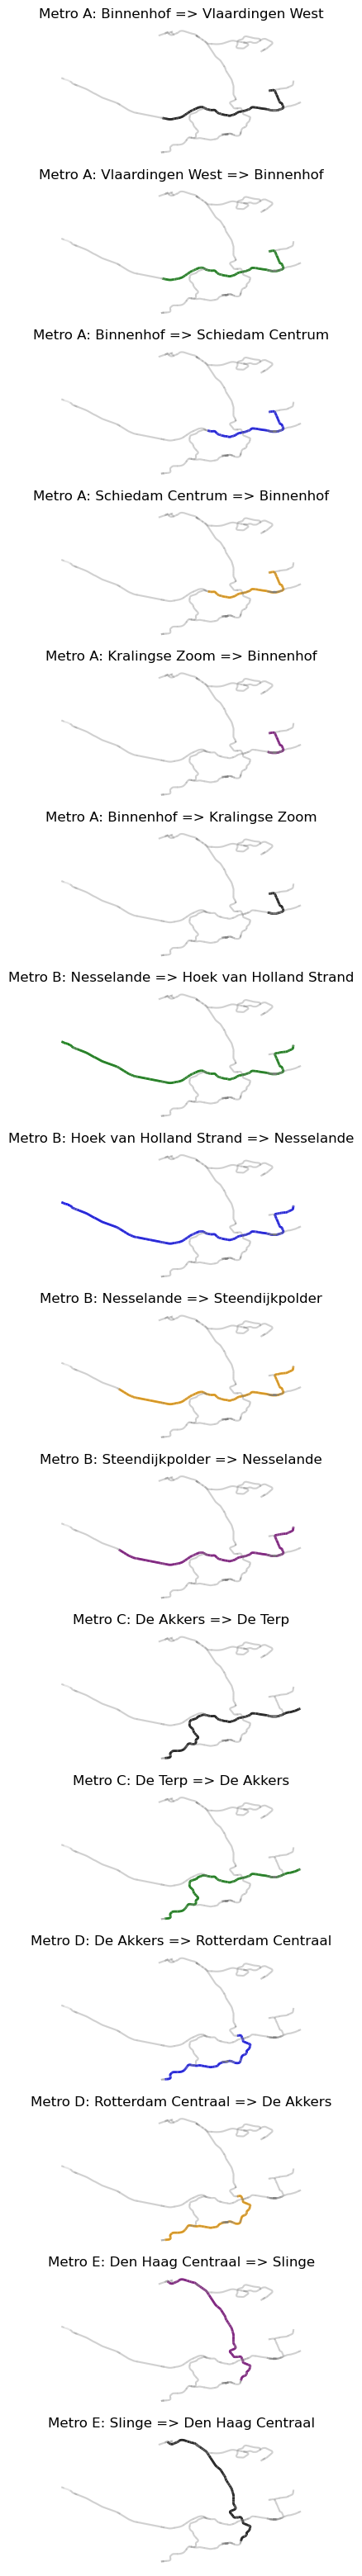

In [9]:
sub_order_route_dict, sub_shortest_path_pairs, sub_shortest_path_edges, sub_edges = metro(sub_stations, edges, nodes, sub_routes, city='Amsterdam')

In [10]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [11]:
aggregation_functions = {
    'name': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [12]:
sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, aggregation_functions, nodes)

In [13]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [14]:
aggregation_functions = {
    'geometry': 'first',
    'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [15]:
sub_new_edges = add_columns_to_edges(sub_shortest_path_edges, aggregation_functions, edges)

In [16]:
sub_path_s_e, sub_length_s_e, sub_short_path_edges_s_e, sub_start_end_points_coordinates_pairs, sub_start_end_nearest_id_pairs = transfer_shortest_path(s_e_coordinates, sub_new_edges, sub_new_nodes)

In [17]:
sub_short_path_edges

Empty DataFrame
Columns: [osm_id, geometry, railway, service, id_x, from_id, to_id, distance, time, weights, to_from, from_to, id_y, count_weight, route_name_list, ref, route]
Index: []

In [18]:
sub_distance_s_s_tuple, sub_distance_e_e_tuple = walking_linear_distance(sub_start_end_points_coordinates_pairs,sub_start_end_nearest_id_pairs, sub_new_nodes)

In [19]:
sub_distance_s_s_tuple

48331.74885128405

In [20]:
sub_distance_e_e_tuple

52520.45155630073

In [21]:
choosesub_using_time_tuple = transfer_using_time(sub_short_path_edges_s_e, sub_distance_s_s_tuple, sub_distance_e_e_tuple)

In [22]:
choosesub_using_time_tuple

(20.170440081516958, 1210, 0.0, 20.170440081516958)

In [23]:
choosesub_using_time_tuple[1]

1210

# Tram

In [24]:
tram_stations, tram_edges, tram_nodes, tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2741/2741 [00:00<00:00, 8592.17it/s]


In [25]:
tram_routes = tram_routes.loc[tram_routes.ref != 'EMA']

In [26]:
tram_routes, check_name = check_tram_routes(tram_stations, tram_routes)

In [27]:
replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

tram_stations, tram_routes, check_name = recheck_tram_routes(replacement_dict, tram_stations, tram_routes)

In [28]:
replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}
tram_stations, tram_routes, check_name = recheck_tram_routes(replacement_dict, tram_stations, tram_routes)

In [29]:
tram_order_route_dict, tram_shortest_path_pairs, tram_shortest_path_edges, tram_edges_dict = tram(tram_stations, tram_edges, tram_nodes, tram_routes, city='Amsterdam')

AttributeError: 'int' object has no attribute 'name'

In [ ]:
tram_shortest_path_edges

In [ ]:
tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(tram_order_route_dict, tram_routes)

In [ ]:
aggregation_functions_nodes = {
    'name': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [ ]:
tram_new_nodes = add_columns_to_nodes(tram_order_route_dict, aggregation_functions_nodes, tram_nodes)

In [ ]:
tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(tram_shortest_path_edges, tram_routes)

In [ ]:
tram_shortest_path_edges

In [ ]:
aggregation_functions_edges = {
    'geometry': 'first',
    'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [ ]:
tram_edges

In [ ]:
tram_new_edges = add_columns_to_edges(tram_shortest_path_edges, aggregation_functions_edges, tram_edges)

In [ ]:
tram_new_edges

In [ ]:
tram_path_s_e, tram_length_s_e, tram_short_path_edges_s_e,tram_start_end_points_coordinates_pairs,tram_start_end_nearest_id_pairs = transfer_shortest_path(s_e_coordinates, tram_new_edges, tram_new_nodes)

In [ ]:
tram_distance_s_s_tuple, tram_distance_e_e_tuple = walking_linear_distance(tram_start_end_points_coordinates_pairs,tram_start_end_nearest_id_pairs,tram_new_nodes)

In [ ]:
tram_distance_s_s_tuple

In [ ]:
tram_distance_e_e_tuple

In [ ]:
chosentram_using_time_tuple = transfer_using_time( tram_short_path_edges_s_e,tram_distance_s_s_tuple, tram_distance_e_e_tuple)

In [48]:
chosentram_using_time_tuple

(0.2606768663240623, 16, 0.13543237628288057, 0.1252444900411817)

# Compare

In [67]:
dict_fastest = compare_using_time_stb(choosesub_using_time_tuple, sub_new_edges, sub_short_path_edges, chosentram_using_time_tuple, tram_new_edges, tram_short_path_edges,choosebus_using_time_tuple,bus_new_edges,bus_short_path_edges_s_e)

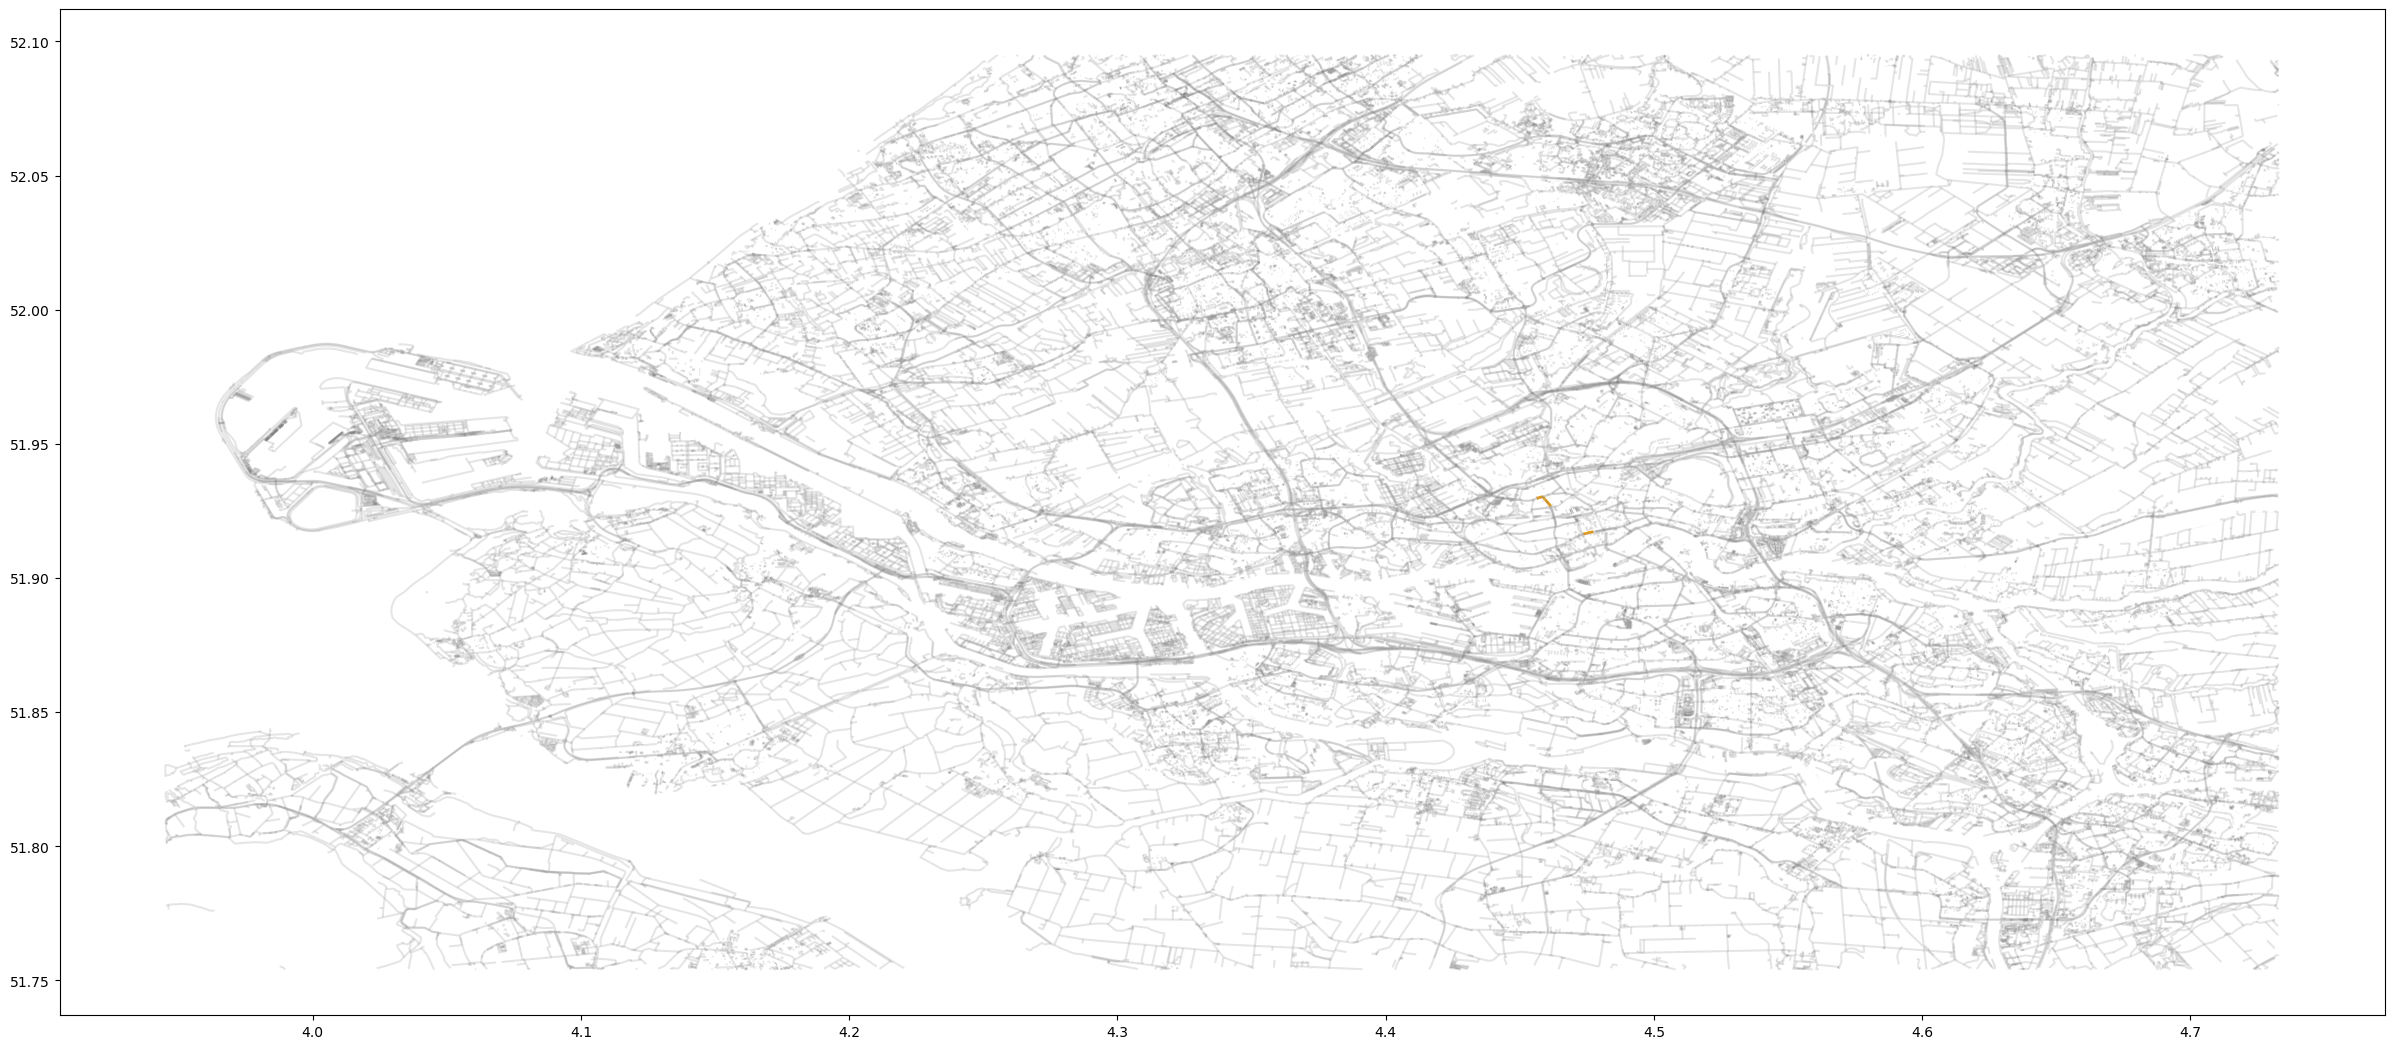

In [68]:
plot_chosen_route(dict_fastest)